# 1. Primary Data Analysis

## 1.1 Connecting libraries and importing data


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import rcParams
%matplotlib inline

In [2]:
def get_count_by_column(dataframe, seach):
    unique, counts = np.unique(np.argwhere(np.isin(dataframe.to_numpy(), seach))[:, 1], return_counts=True)
    print(f"Search {seach} value: ", dict(zip(dataframe.columns[unique], counts)))

def show_heatmap_corr(df, fname = None):
    corr_df = df.corr()
    sns.set(font_scale = 0.8)
    figure(figsize = (4, 3), dpi = 120)
    sns.heatmap(corr_df)
    if fname is not None:
        plt.savefig(fname)

def std_scale(df, column):
    std_scale = preprocessing.StandardScaler().fit(df[[column]])
    df_std = std_scale.transform(df[[column]])
    print(f'Mean after standardization: {column} = {df_std[:,0].mean()}')
    print(f'Standard deviation after standardization: {column} = {df_std[:,0].std()}\n')
    return df_std

def minmax_scale(df, column):
    minmax_scale = preprocessing.MinMaxScaler().fit(df[[column]])
    df_minmax = minmax_scale.transform(df[[column]])
    print(f'Min-value after min-max scaling: {column}={df_minmax[:,0].min()}')
    print(f'Max-value after min-max scaling: {column}={df_minmax[:,0].max()}\n')
    return df_minmax

def plot(df, x, y, df_std_x, df_std_y, df_minmax_x, df_minmax_y, fname):
    plt.figure(figsize=(8,6))
    plt.scatter(df[x], df[y], color = 'green', label = 'input scale', alpha=0.5)
    plt.scatter(df_std_x, df_std_y, color='red', label = 'Standardized [N  (m=0, ; d=1)]', alpha = 0.3)
    plt.scatter(df_minmax_x, df_minmax_y, color = 'blue', label = 'min-max scaled [min=0, max=1]', alpha = 0.3)
    plt.title(f'{x} and {y} content of the wine dataset')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(loc = 'upper left')
    plt.grid()
    plt.tight_layout()
    plt.savefig(fname)
    
def PCA_dimensionality_reduction(df, dimension, columns):
    pca = PCA(n_components = dimension)
    pca.fit(df)
    df_PCA = pca.transform(df)
    df_PCA = pd.DataFrame(df_PCA, columns=columns)
    return df_PCA

def get_best_n_neighbors(accuracy_score_list):
    return list(dict(sorted(accuracy_score_list.items(), key=lambda item: item[1])).keys())[-1]

def classify_and_plot(X, y, n_neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 41)

    h           = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

    rcParams['figure.figsize'] = 5, 5
    for weights in ['uniform', 'distance']:
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)   
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("0/1 outcome classification (k = %i, weights = '%s')" % (n_neighbors, weights))
        plt.show()
        fig.savefig(weights +'.png')

In [3]:
df_ab = pd.read_csv('Data Folder/abalone.data', names=[
    "Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"
])

Note that in the imported dataset we do not have headers. Additionally, we import headers


## 1.2 General information


In [4]:
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df_ab

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

Sex is a categorical feature;  
Rings - ordinal feature;  
All other features are numeric


# 2. Type conversion and value adjustment


In [6]:
cdf_ab = df_ab.copy() # cdf - cleared data frame
get_count_by_column(cdf_ab, 0)
get_count_by_column(cdf_ab, np.nan)
get_count_by_column(cdf_ab, None)
get_count_by_column(cdf_ab, [np.inf, -np.inf])

Search 0 value:  {'Height': 2}
Search nan value:  {}
Search None value:  {}
Search [inf, -inf] value:  {}


The description of the dataset says that examples with missing values ​​​​have been removed from the source data (in most cases, there is no predicted value). It's strange that two 0's were found in the Height column, let's take a look at these instances.


In [7]:
cdf_ab[cdf_ab['Height'] == 0]

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
1257   I   0.430      0.34     0.0         0.428          0.2065   
3996   I   0.315      0.23     0.0         0.134          0.0575   

      Viscera weight  Shell weight  Rings  
1257          0.0860        0.1150      8  
3996          0.0285        0.3505      6

As stated in the description, Height is the height with the meat in the shell in millimeters


Let's take a look at the distribution of Height field values


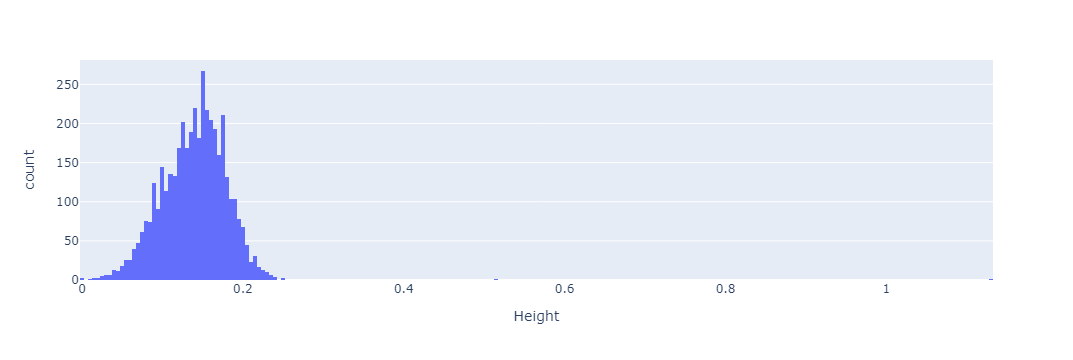

In [8]:
fig = px.histogram(cdf_ab['Height'], x="Height")
fig.show()

In [9]:
cdf_ab.Height.mean()

0.13951639932966242

As you can see, the average value is > 0.13. Let's remove these two instances for better model accuracy.


In [10]:
cdf_ab = cdf_ab.drop(cdf_ab[cdf_ab['Height'] == 0].index.values)
cdf_ab

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4175 rows x 9 columns]

# 3. Feature engineering

Let's build a heat map based on the pairwise correlation of columns


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1332\3383181886.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



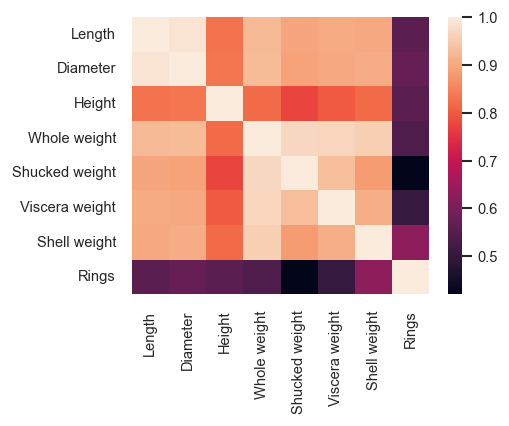

In [11]:
show_heatmap_corr(cdf_ab, 'cdf_ab_corr.png')

Many features correlate with each other. Let's take a look at the distribution of Diameter, Length and Height features and their relationship


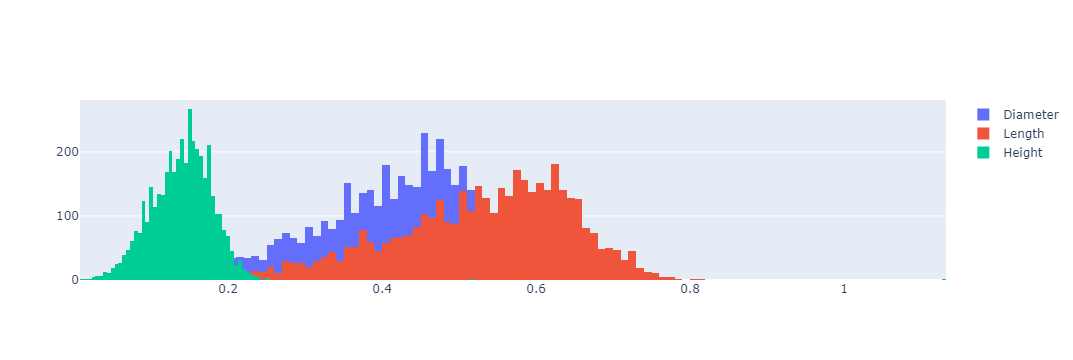

In [12]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = cdf_ab['Diameter'], name='Diameter'))
fig.add_trace(go.Histogram(x = cdf_ab['Length'], name='Length'))
fig.add_trace(go.Histogram(x = cdf_ab['Height'], name='Height'))
fig.update_layout(barmode = 'overlay')
fig.show()

It is interesting to look at the paired graphs for the Diameter, Length and Height features.


In [13]:
cdf_ab[['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]

Whole weight  Shucked weight  Viscera weight  Shell weight
0           0.5140          0.2245          0.1010        0.1500
1           0.2255          0.0995          0.0485        0.0700
2           0.6770          0.2565          0.1415        0.2100
3           0.5160          0.2155          0.1140        0.1550
4           0.2050          0.0895          0.0395        0.0550
...            ...             ...             ...           ...
4172        0.8870          0.3700          0.2390        0.2490
4173        0.9660          0.4390          0.2145        0.2605
4174        1.1760          0.5255          0.2875        0.3080
4175        1.0945          0.5310          0.2610        0.2960
4176        1.9485          0.9455          0.3765        0.4950

[4175 rows x 4 columns]

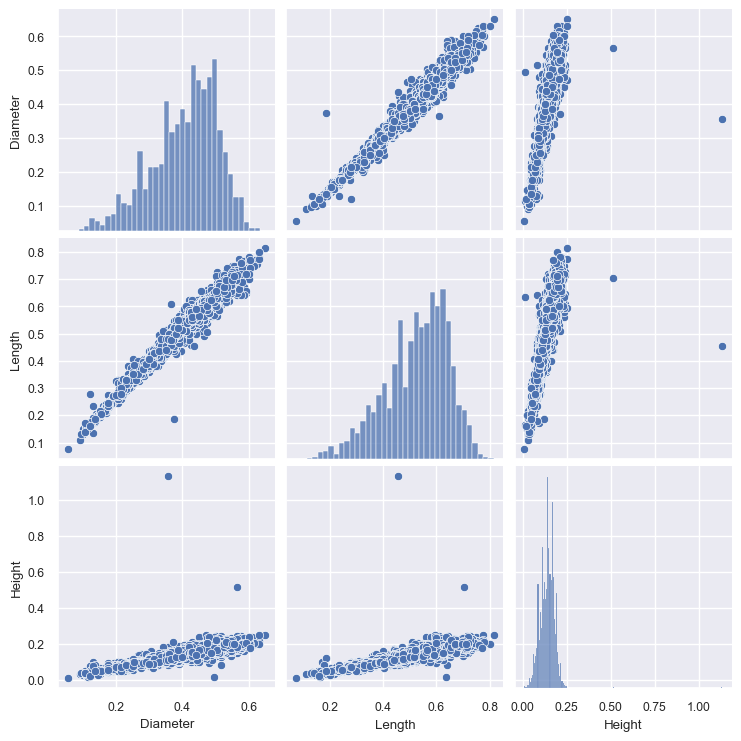

In [14]:
%config InlineBackend.figure_format = 'png'
cdf_ww_pairplot = sns.pairplot(cdf_ab[['Diameter', 'Length', 'Height']]);
cdf_ww_pairplot.fig.savefig("cdf_ab_Diameter_Length_Height_pairplot.png")

It can be assumed that there is a linear relationship between these features, however, we see that some instances on the graphs go far beyond the distribution


Take a look at the overlaid histogram of abalone weights


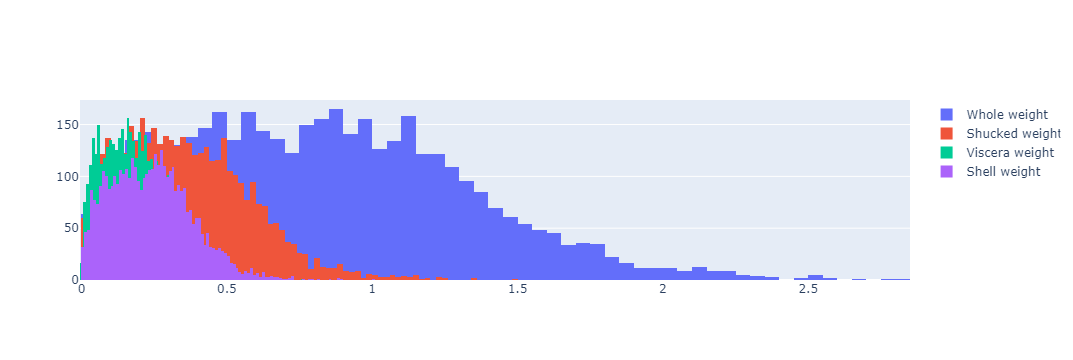

In [15]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = cdf_ab['Whole weight'], name='Whole weight'))
fig.add_trace(go.Histogram(x = cdf_ab['Shucked weight'], name='Shucked weight'))
fig.add_trace(go.Histogram(x = cdf_ab['Viscera weight'], name='Viscera weight'))
fig.add_trace(go.Histogram(x = cdf_ab['Shell weight'], name='Shell weight'))
fig.update_layout(barmode = 'overlay')
fig.show()

Let's take a look at pair plots for weights


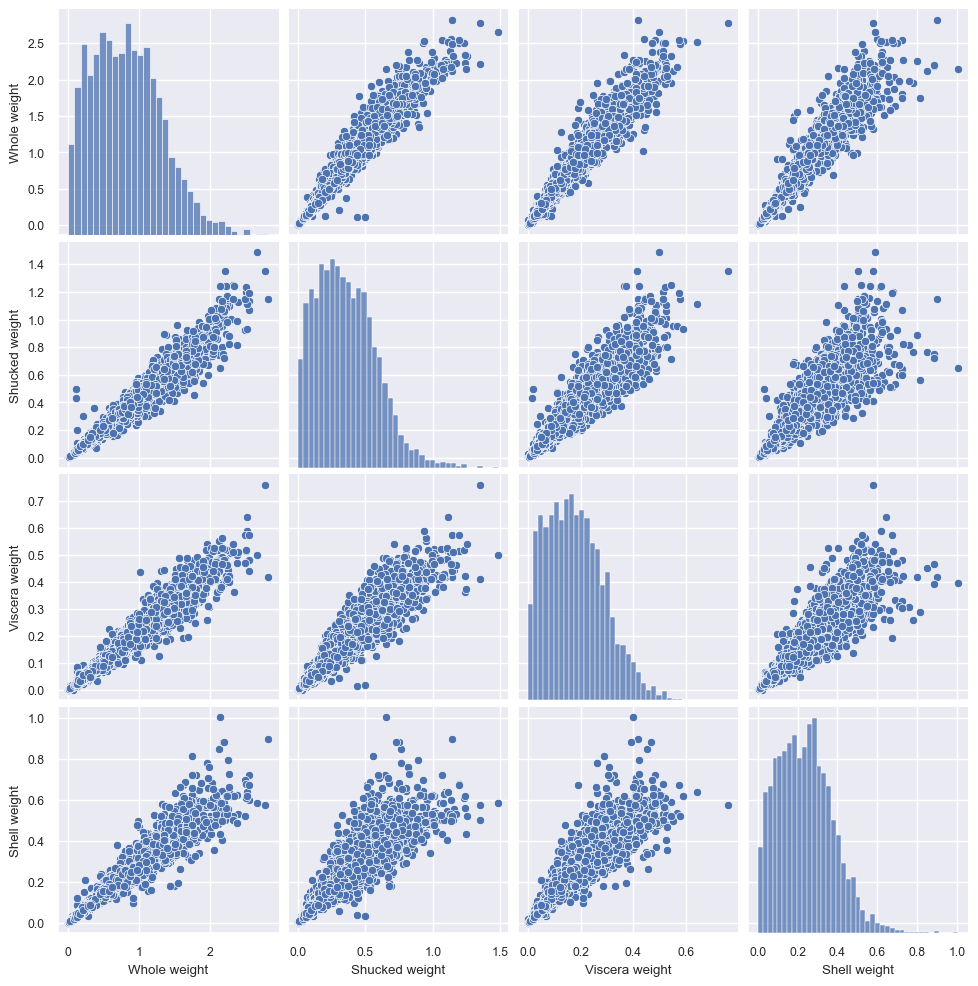

In [16]:
%config InlineBackend.figure_format = 'png'
cdf_ww_pairplot = sns.pairplot(cdf_ab[['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]);
cdf_ww_pairplot.fig.savefig("cdf_ab_Whole_Shucked_Viscera_Shell_weights_pairplot.png")

It can be assumed that the features of the weights are vaguely reminiscent of a linear relationship


Let's create two new features:

1. Length_Diameter_Height = Length * Diameter * Height; 
2. Whole_Shucked_Viscera_Shell_weight = 'Whole weight'+'Shucked weight'+'Viscera weight'+'Shell weight'

In [17]:
cdf_ab['Length_Diameter_Height'] = cdf_ab['Length'] * cdf_ab['Diameter'] * cdf_ab['Height']
cdf_ab['Whole_Shucked_Viscera_Shell_weight'] = cdf_ab['Whole weight'] + cdf_ab['Shucked weight'] + cdf_ab['Viscera weight'] + cdf_ab['Shell weight']

Delete the columns that were used to create new features


In [18]:
cdf_ab = cdf_ab.drop(columns=['Length', 'Diameter', 'Height'])
cdf_ab = cdf_ab.drop(columns=['Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'])

Display unique values ​​for the Sex column


In [19]:
cdf_ab_sex_unique = cdf_ab['Sex'].unique()
cdf_ab_sex_unique

array(['M', 'F', 'I'], dtype=object)

Encode the values ​​of the Sex column to convert from a categorical to a power feature


In [20]:
cdf_ab_sex_le = preprocessing.LabelEncoder()
cdf_ab_sex_le.fit(cdf_ab_sex_unique)

LabelEncoder()

In [21]:
list(cdf_ab_sex_le.classes_)

['F', 'I', 'M']

In [22]:
cdf_ab_sex_le.transform(['F', 'F', 'I', 'M']) 

array([0, 0, 1, 2])

In [23]:
cdf_ab['Sex'] = cdf_ab_sex_le.transform(cdf_ab['Sex'].values)

Let's look at the correlation map again


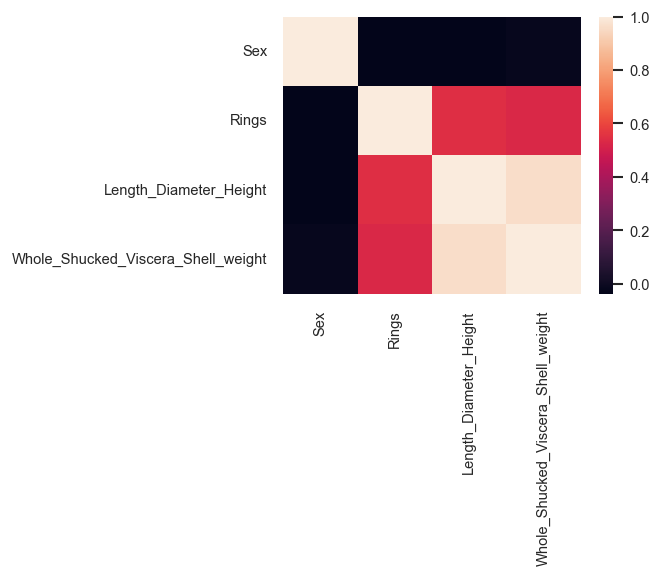

In [24]:
show_heatmap_corr(cdf_ab)

We got rid of almost all dependencies above 0.8


We will temporarily remove the Sex column from the dataset, at the moment it will only interfere with us


In [25]:
cdf_ab = cdf_ab.drop(columns=['Sex'])

# 4. Dividing the dataset into training and test parts and scaling features


In [26]:
X, y = cdf_ab[['Length_Diameter_Height', 'Whole_Shucked_Viscera_Shell_weight']], cdf_ab[['Rings']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
qt = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = X_train.copy()
X_test_trans = X_test.copy()
qt_X_train_trans = qt.fit_transform(X_train[['Length_Diameter_Height', 'Whole_Shucked_Viscera_Shell_weight']])
X_train_trans['Length_Diameter_Height'], X_train_trans['Whole_Shucked_Viscera_Shell_weight'] = qt_X_train_trans[:, 0], qt_X_train_trans[:, 1]
qt_X_test_trans = qt.transform(X_test[['Length_Diameter_Height', 'Whole_Shucked_Viscera_Shell_weight']])
X_test_trans['Length_Diameter_Height'], X_test_trans['Whole_Shucked_Viscera_Shell_weight'] = qt_X_test_trans[:, 0], qt_X_test_trans[:, 1]

In [27]:
np.percentile(X_train[['Length_Diameter_Height']], [0, 25, 50, 75, 100]) 

array([4.12500000e-05, 1.82725000e-02, 3.29925000e-02, 4.91827500e-02,
       2.05137375e-01])

In [28]:
np.percentile(X_train[['Whole_Shucked_Viscera_Shell_weight']], [0, 25, 50, 75, 100])

array([5.0000e-03, 8.6800e-01, 1.5625e+00, 2.2520e+00, 5.2295e+00])

In [29]:
np.percentile(X_train_trans[['Length_Diameter_Height']], [0, 25, 50, 75, 100])

array([0.        , 0.24964937, 0.50029741, 0.7500606 , 1.        ])

In [30]:
np.percentile(X_train_trans[['Whole_Shucked_Viscera_Shell_weight']], [0, 25, 50, 75, 100])

array([0.        , 0.24991791, 0.50008035, 0.75      , 1.        ])

In [31]:
np.percentile(X_test[['Length_Diameter_Height']], [0, 25, 50, 75, 100])

array([0.00044   , 0.01707319, 0.03254475, 0.04804625, 0.1324375 ])

In [32]:
np.percentile(X_test[['Whole_Shucked_Viscera_Shell_weight']], [0, 25, 50, 75, 100])

array([0.026   , 0.837875, 1.52575 , 2.200625, 5.466   ])

In [33]:
np.percentile(X_test_trans[['Length_Diameter_Height']], [0, 25, 50, 75, 100])

array([0.00254161, 0.23174227, 0.49230008, 0.73789105, 0.99927254])

In [34]:
np.percentile(X_test_trans[['Whole_Shucked_Viscera_Shell_weight']], [0, 25, 50, 75, 100])

array([0.00105121, 0.23726528, 0.48667958, 0.73266603, 1.        ])

# 5. Classification model


## 5.1 Dataset analysis cdf_ab

Let's plot the features Length_Diameter_Height and Whole_Shucked_Viscera_Shell_weight on the scatterplot


<Axes: xlabel='Length_Diameter_Height', ylabel='Whole_Shucked_Viscera_Shell_weight'>

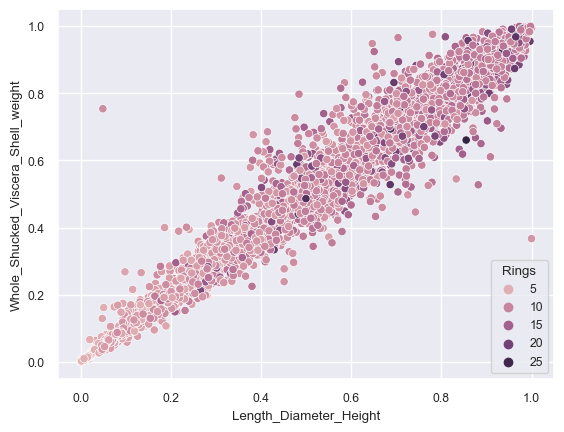

In [35]:
sns.scatterplot(x=X_train_trans['Length_Diameter_Height'],y=X_train_trans['Whole_Shucked_Viscera_Shell_weight'], hue=y_train['Rings'])

From this diagram it can be seen that the smaller the ear in terms of volume and weight, the younger it is. Dark pink dots indicate the oldest ears


For more information, take a look at the distribution of the Rings feature.


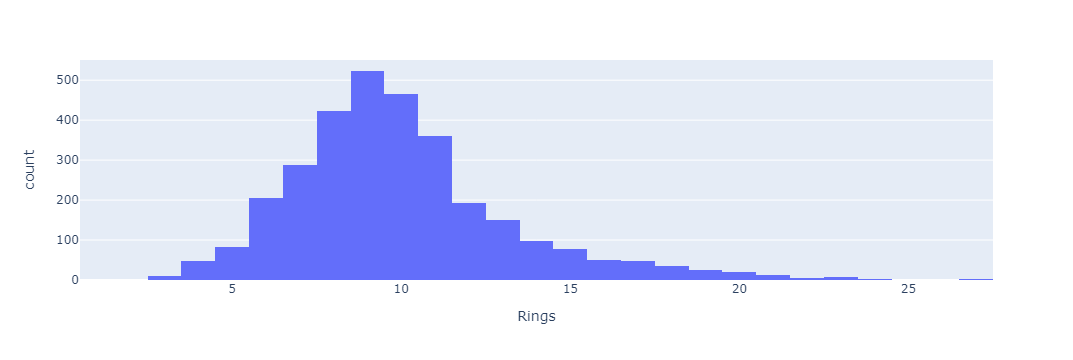

In [36]:
fig = px.histogram(y_train['Rings'], x="Rings")
fig.show()

Let's take a look at the normal distribution of the Rings feature


Mean after standardization: Rings = 1.134689772852284e-16
Standard deviation after standardization: Rings = 1.0



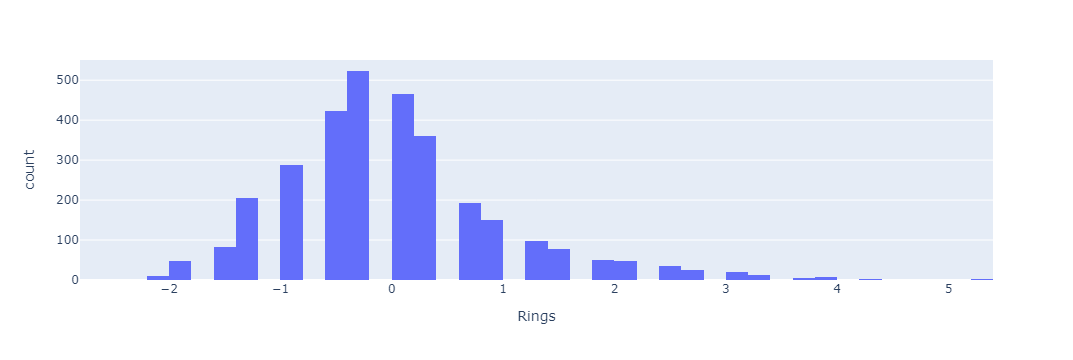

In [37]:
std_scale_y_train_Rings = std_scale(y_train, 'Rings')
std_scale_y_train_Rings = pd.DataFrame(data=std_scale_y_train_Rings[:,0], columns=['Rings'])
fig = px.histogram(std_scale_y_train_Rings, x="Rings")
fig.show()

Calculate the average value for the feature Rings


In [38]:
y_train['Rings'].mean()

9.947301181731076

Thus, we can conclude that the average age of the ears is almost 11.5 years (10 + 1.5). Based on the paired graph above, we can conclude that there should be a majority of such ears


## 5.2 Building a classification model and fitting hyperparameters (accuracy_score, GridSearchCV)


### 5.2.1 k_range(1,31)

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_trans, y_train.values.ravel())
y_test_pred = knn.predict(X_test_trans)

Assessment of classification accuracy using the accuracy_score function:


In [40]:
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.1839080459770115

Average precision for the given test data and labels using the score function:


In [41]:
knn.score(X_test_trans, y_test)

0.1839080459770115

As you can see, the classification accuracy score and the average accuracy for the given test data and labels are the same


Selection of hyperparameters:


In [42]:
knn_clf = KNeighborsClassifier()
parameters_clf = {'n_neighbors': [i for i in range (1,31)]}
clf = GridSearchCV(knn_clf, parameters_clf)
clf.fit(X_train_trans, y_train.values.ravel())

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [43]:
clf_best_params_ = clf.best_params_
clf_best_params_

{'n_neighbors': 24}

In [44]:
knn = KNeighborsClassifier(n_neighbors=clf_best_params_['n_neighbors'])
knn.fit(X_train_trans, y_train.values.ravel())
y_test_pred = knn.predict(X_test_trans)

Assessment of classification accuracy using the accuracy_score function:


In [45]:
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.22701149425287356

Average precision for given test data and labels:


In [46]:
knn.score(X_test_trans, y_test)

0.22701149425287356

Here we also see that the classification accuracy score and the average accuracy for the given test data and labels are the same. But thanks to the selection of hyperparameters, we managed to increase this indicator.


### 5.2.1 k_range(1,100)

In [47]:
knn_k100 = KNeighborsClassifier(n_neighbors=3)
knn_k100.fit(X_train_trans, y_train.values.ravel())
y_test_pred_k100 = knn_k100.predict(X_test_trans)

Assessment of classification accuracy using the accuracy_score function:


In [48]:
accuracy_k100 = accuracy_score(y_test, y_test_pred_k100)
accuracy_k100

0.1839080459770115

Average precision for the given test data and labels using the score function:


In [49]:
knn_k100.score(X_test_trans, y_test)

0.1839080459770115

As you can see, the classification accuracy score and the average accuracy for the given test data and labels are the same


Selection of hyperparameters:


In [50]:
knn_clf_k100 = KNeighborsClassifier()
parameters_clf_k100 = {'n_neighbors': [i for i in range (1,100)]}
clf_k100 = GridSearchCV(knn_clf_k100, parameters_clf_k100)
clf_k100.fit(X_train_trans, y_train.values.ravel())

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

## 5.3 Building a classification model and selecting hyperparameters (accuracy_score, confusion_matrix, classification_report)


### 5.3.1 k_range(1,31)

Let's find out the number of unique classes of the Rings test target:


In [51]:
len(y_test['Rings'].unique())

23

In [52]:
range_k = range(1,31)
accuracy_score_list = {}
for k in range_k:
   cls = KNeighborsClassifier(n_neighbors=k)
   cls.fit(X_train_trans, y_train.values.ravel())
   y_pred = cls.predict(X_test_trans)
   accuracy_score_list[k] = metrics.accuracy_score(y_test,y_pred)

Let's find the best k accuracy:


In [53]:
best_k = list(dict(sorted(accuracy_score_list.items(), key=lambda item: item[1])).keys())[-1]
best_k

18

Retrain with the best coefficient k (best_k)


In [54]:
cls = KNeighborsClassifier(n_neighbors=best_k)
cls.fit(X_train_trans, y_train.values.ravel())
y_pred = cls.predict(X_test_trans)

Number of unique classes of predicted target Rings:


In [55]:
np.unique(y_pred).size

10

In [56]:
print('Confusion matrix:\n')
print(metrics.confusion_matrix(y_test.values.ravel(), y_pred))

Confusion matrix:

[[ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  8 13  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9 18 16  5  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 31 26 27  8  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 12 21 55 34 16  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 14 31 64 29 20  1  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 11 25 60 37 22  6  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  6 20 26 39 31  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4  9 21 18 18  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  8 14 10 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  7 10  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  7 10  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  3  8  2  0  0  0  0  0  

In [57]:
print('Classification report:\n')
print(metrics.classification_report(y_test, y_pred, zero_division=0))

Classification report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.12      0.20      0.15        10
           5       0.25      0.25      0.25        32
           6       0.20      0.35      0.25        52
           7       0.25      0.25      0.25       102
           8       0.28      0.38      0.32       145
           9       0.25      0.39      0.30       166
          10       0.20      0.22      0.21       169
          11       0.23      0.25      0.24       126
          12       0.22      0.05      0.09        75
          13       0.00      0.00      0.00        52
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.00        17
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         8
   

support - the number of occurrences of each label in y_true


Text(0, 0.5, 'Accuracy')

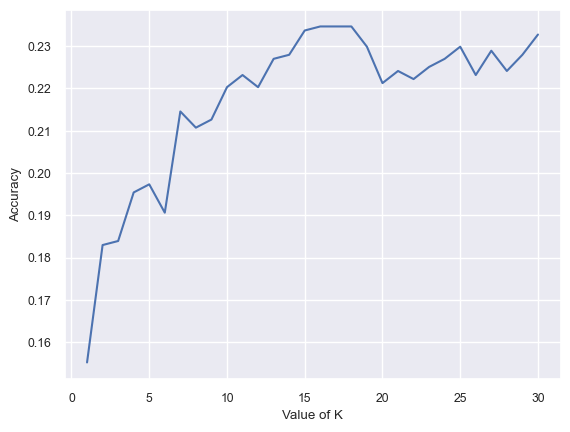

In [58]:
plt.plot(range_k,list(accuracy_score_list.values()))
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

### 5.3.2 k_range(1,100)

In [59]:
range_k100 = range(1,100)
accuracy_score_list_k100 = {}
for k_k100 in range_k100:
   cls_k100 = KNeighborsClassifier(n_neighbors=k_k100)
   cls_k100.fit(X_train_trans, y_train.values.ravel())
   y_pred_k100 = cls_k100.predict(X_test_trans)
   accuracy_score_list_k100[k_k100] = metrics.accuracy_score(y_test,y_pred_k100)

# 6. Evaluation of results


## 6.1 accuracy_score, GridSearchCV

### 6.1.1 k_range(1,100)

In [60]:
clf_best_params_k100 = clf_k100.best_params_
clf_best_params_k100

{'n_neighbors': 78}

In [61]:
knn_k100 = KNeighborsClassifier(n_neighbors=clf_best_params_k100['n_neighbors'])
knn_k100.fit(X_train_trans, y_train.values.ravel())
y_test_pred_k100 = knn_k100.predict(X_test_trans)

Assessment of classification accuracy using the accuracy_score function:


In [62]:
accuracy_k100 = accuracy_score(y_test, y_test_pred_k100)
accuracy_k100

0.26053639846743293

Average precision for given test data and labels:


In [63]:
knn_k100.score(X_test_trans, y_test)

0.26053639846743293

Here we also see that the classification accuracy score and the average accuracy for the given test data and labels are the same. But thanks to the selection of hyperparameters, we managed to increase this indicator. In addition, this score for sampling the best k out of 100 is greater than the same score for sampling the best k out of 31 (accuracy_k100 > accuracy and knn_k100.score(X_test_trans, y_test) > knn.score(X_test_trans, y_test))


## 6.2 accuracy_score, confusion_matrix, classification_report

### 6.2.1 k_range(1,100)

Let's find out the number of unique classes of the Rings test target:


In [64]:
len(y_test['Rings'].unique())

23

Let's find the best k accuracy:


In [65]:
best_k100 = get_best_n_neighbors(accuracy_score_list_k100)
best_k100

79

Retrain with the best coefficient k (best_k)


In [66]:
cls_k100 = KNeighborsClassifier(n_neighbors=best_k100)
cls_k100.fit(X_train_trans, y_train.values.ravel())
y_pred_k100 = cls_k100.predict(X_test_trans)

Number of unique classes of predicted target Rings:


In [67]:
np.unique(y_pred_k100).size

8

Note that there are 2 fewer classes than in the k_range(1.31) sample


In [68]:
print('Confusion matrix:\n')
print(metrics.confusion_matrix(y_test.values.ravel(), y_pred_k100))

Confusion matrix:

[[ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8 12  8  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 18 22  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 20 43 27  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  7 25 50 47 11  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 19 25 71 31 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6 12 21 59 41 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  5 15 39 27 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  8 26 19 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  9 16 10 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5 12  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  8  9  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  3  7  3  0  0  0  0  0  

In [69]:
print('Classification report:\n')
print(metrics.classification_report(y_test, y_pred_k100, zero_division=0))

Classification report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.17      0.30      0.21        10
           5       0.41      0.38      0.39        32
           6       0.27      0.35      0.31        52
           7       0.31      0.42      0.36       102
           8       0.28      0.34      0.31       145
           9       0.23      0.43      0.30       166
          10       0.24      0.24      0.24       169
          11       0.27      0.29      0.28       126
          12       0.00      0.00      0.00        75
          13       0.00      0.00      0.00        52
          14       0.00      0.00      0.00        28
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.00        17
          17       0.00      0.00      0.00        11
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         8
   

As you can see, the accuracy increased from 0.23 (in the model with a sample of 31) to 0.26 (in the model with a sample of 100)


Text(0, 0.5, 'Accuracy')

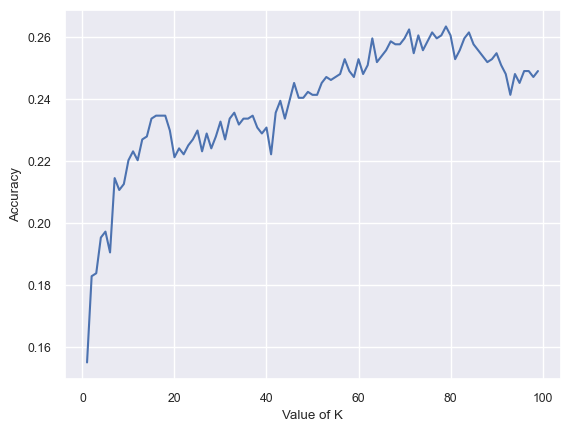

In [70]:
plt.plot(range_k100,list(accuracy_score_list_k100.values()))
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

# 7. Building a Classification Graph


Dataset feature scaling X:


In [71]:
X_qt = preprocessing.QuantileTransformer(random_state=0)
X_trans = X_qt.fit_transform(X[['Length_Diameter_Height', 'Whole_Shucked_Viscera_Shell_weight']])

Let's try to display the classification model on the chart:


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



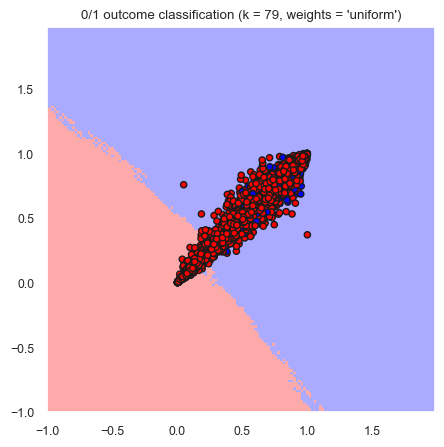

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



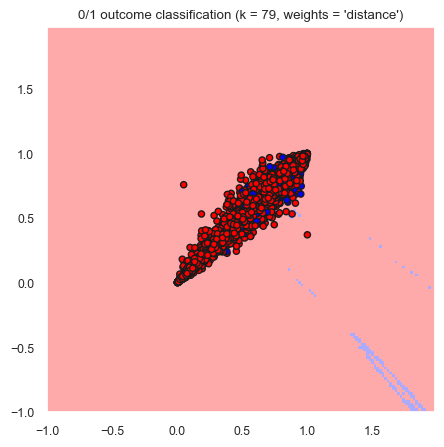

In [72]:
classify_and_plot(X_trans, y.to_numpy(), best_k100)